In [1]:
#imported essential libraries
import numpy as np
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#reading the 
df = pd.read_csv('GlobalWeatherRepository.csv')
df1 = df[['country','location_name', 'last_updated', 'temperature_celsius', 'condition_text',
         'wind_kph', 'latitude', 'humidity', 'cloud', 'sunrise', 'sunset', 'visibility_km']]
df1

,country,location_name,last_updated,temperature_celsius,condition_text,wind_kph,latitude,humidity,cloud,sunrise,sunset,visibility_km
0,Afghanistan,Kabul,2024-05-16 13:15,26.6,Partly Cloudy,13.3,34.5200,24,30,04:50 AM,06:50 PM,10.0
1,Albania,Tirana,2024-05-16 10:45,19.0,Partly cloudy,11.2,41.3300,94,75,05:21 AM,07:54 PM,10.0
2,Algeria,Algiers,2024-05-16 09:45,23.0,Sunny,15.1,36.7600,29,0,05:40 AM,07:50 PM,10.0
3,Andorra,Andorra La Vella,2024-05-16 10:45,6.3,Light drizzle,11.9,42.5000,61,100,06:31 AM,09:11 PM,2.0
4,Angola,Luanda,2024-05-16 09:45,26.0,Partly cloudy,13.0,-8.8400,89,50,06:12 AM,05:55 PM,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73455,Venezuela,Caracas,2025-05-29 04:45,24.2,Mist,7.9,10.5000,78,0,06:04 AM,06:46 PM,2.0
73456,Vietnam,Hanoi,2025-05-29 15:45,27.3,Partly cloudy,19.8,21.0333,79,75,05:15 AM,06:33 PM,10.0
73457,Yemen,Sanaa,2025-05-29 11:45,26.9,Sunny,5.8,15.3547,10,6,05:32 AM,06:29 PM,10.0
73458,Zambia,Lusaka,2025-05-29 10:45,19.7,Sunny,17.6,-15.4167,53,23,06:25 AM,05:43 PM,10.0


In [11]:
df2 = df1.rename(columns = {'condition_text': 'Weather_condition'})
df2['last_updated'] = pd.to_datetime(df2['last_updated'])
df2['hour']  = df2['last_updated'].dt.hour
df2['day']   = df2['last_updated'].dt.day
df2['month'] = df2['last_updated'].dt.month
df2['min'] = df2['last_updated'].dt.minute
df3 = df2.drop(['last_updated'], axis = 1)

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73460 entries, 0 to 73459
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              73460 non-null  object 
 1   location_name        73460 non-null  object 
 2   temperature_celsius  73460 non-null  float64
 3   Weather_condition    73460 non-null  object 
 4   wind_kph             73460 non-null  float64
 5   latitude             73460 non-null  float64
 6   humidity             73460 non-null  int64  
 7   cloud                73460 non-null  int64  
 8   sunrise              73460 non-null  object 
 9   sunset               73460 non-null  object 
 10  visibility_km        73460 non-null  float64
 11  hour                 73460 non-null  int32  
 12  day                  73460 non-null  int32  
 13  month                73460 non-null  int32  
 14  min                  73460 non-null  int32  
dtypes: float64(4), int32(4), int64(2), o

In [15]:
df3.describe()

,temperature_celsius,wind_kph,latitude,humidity,cloud,visibility_km,hour,day,month,min
count,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000
mean,22.196401,13.332797,19.131466,63.643752,39.893289,9.615312,12.222134,15.945984,6.463626,22.251293
std,9.368496,13.873580,24.473678,24.311400,33.845301,2.533407,4.624984,8.764672,3.402041,17.032652
min,-24.900000,3.600000,-41.300000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,16.900000,6.500000,3.750000,46.000000,2.000000,10.000000,10.000000,8.000000,4.000000,0.000000
50%,24.500000,11.200000,17.250000,69.000000,31.000000,10.000000,12.000000,16.000000,6.000000,15.000000
75%,28.300000,18.400000,40.400000,83.000000,75.000000,10.000000,15.000000,24.000000,9.000000,45.000000
max,49.200000,2963.200000,64.150000,100.000000,100.000000,32.000000,23.000000,31.000000,12.000000,45.000000


In [17]:
df3['country'].str.count('Afghanistan').sum()

378

In [19]:
df3[df3['country'] == 'Afghanistan']['location_name']

0        Kabul
195      Kabul
390      Kabul
583      Kabul
776      Kabul
         ...  
72485    Kabul
72680    Kabul
72875    Kabul
73070    Kabul
73265    Kabul
Name: location_name, Length: 378, dtype: object

In [21]:
df4 = df3.copy()
df4['sunrise'] = pd.to_datetime(df4['sunrise'], format='%I:%M %p')
df4['sunset'] = pd.to_datetime(df4['sunset'], format='%I:%M %p')
df4['daylight_hours'] = (df4['sunset'] - df4['sunrise']).dt.total_seconds() / 3600
df4['daylight_hours'].round(2)
df5 = df4.drop(['sunrise', 'sunset'], axis =1)
df5

,country,location_name,temperature_celsius,Weather_condition,wind_kph,latitude,humidity,cloud,visibility_km,hour,day,month,min,daylight_hours
0,Afghanistan,Kabul,26.6,Partly Cloudy,13.3,34.5200,24,30,10.0,13,16,5,15,14.000000
1,Albania,Tirana,19.0,Partly cloudy,11.2,41.3300,94,75,10.0,10,16,5,45,14.550000
2,Algeria,Algiers,23.0,Sunny,15.1,36.7600,29,0,10.0,9,16,5,45,14.166667
3,Andorra,Andorra La Vella,6.3,Light drizzle,11.9,42.5000,61,100,2.0,10,16,5,45,14.666667
4,Angola,Luanda,26.0,Partly cloudy,13.0,-8.8400,89,50,10.0,9,16,5,45,11.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73455,Venezuela,Caracas,24.2,Mist,7.9,10.5000,78,0,2.0,4,29,5,45,12.700000
73456,Vietnam,Hanoi,27.3,Partly cloudy,19.8,21.0333,79,75,10.0,15,29,5,45,13.300000
73457,Yemen,Sanaa,26.9,Sunny,5.8,15.3547,10,6,10.0,11,29,5,45,12.950000
73458,Zambia,Lusaka,19.7,Sunny,17.6,-15.4167,53,23,10.0,10,29,5,45,11.300000


In [23]:
df5['Weather_condition']

0        Partly Cloudy
1        Partly cloudy
2                Sunny
3        Light drizzle
4        Partly cloudy
             ...      
73455             Mist
73456    Partly cloudy
73457            Sunny
73458            Sunny
73459            Sunny
Name: Weather_condition, Length: 73460, dtype: object

In [25]:
df5['Weather_condition'].value_counts()

Weather_condition
Partly cloudy                                  24412
Sunny                                          22146
Patchy rain nearby                              5795
Partly Cloudy                                   3543
Overcast                                        3507
Clear                                           3145
Mist                                            2260
Light rain                                      2120
Light rain shower                               1815
Fog                                              682
Cloudy                                           677
Moderate or heavy rain with thunder              595
Moderate rain                                    499
Patchy light rain with thunder                   427
Light drizzle                                    323
Patchy light drizzle                             219
Light snow                                       189
Moderate or heavy rain shower                    178
Thundery outbreaks in nearby

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df5['Weather_condition'] = le.fit_transform(df5['Weather_condition'])



In [29]:
le = LabelEncoder()
df6 = df5.copy()
df6['country'] = le.fit_transform(df6['country'])

df6['location_name'] = le.fit_transform(df6['location_name'])
df6


,country,location_name,temperature_celsius,Weather_condition,wind_kph,latitude,humidity,cloud,visibility_km,hour,day,month,min,daylight_hours
0,0,98,26.6,29,13.3,34.5200,24,30,10.0,13,16,5,15,14.000000
1,1,225,19.0,30,11.2,41.3300,94,75,10.0,10,16,5,45,14.550000
2,2,11,23.0,43,15.1,36.7600,29,0,10.0,9,16,5,45,14.166667
3,3,14,6.3,10,11.9,42.5000,61,100,2.0,10,16,5,45,14.666667
4,4,122,26.0,30,13.0,-8.8400,89,50,10.0,9,16,5,45,11.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73455,200,58,24.2,18,7.9,10.5000,78,0,2.0,4,29,5,45,12.700000
73456,201,86,27.3,30,19.8,21.0333,79,75,10.0,15,29,5,45,13.300000
73457,202,205,26.9,43,5.8,15.3547,10,6,10.0,11,29,5,45,12.950000
73458,203,123,19.7,43,17.6,-15.4167,53,23,10.0,10,29,5,45,11.300000


In [31]:
numeric_df = df6.select_dtypes(include='number')

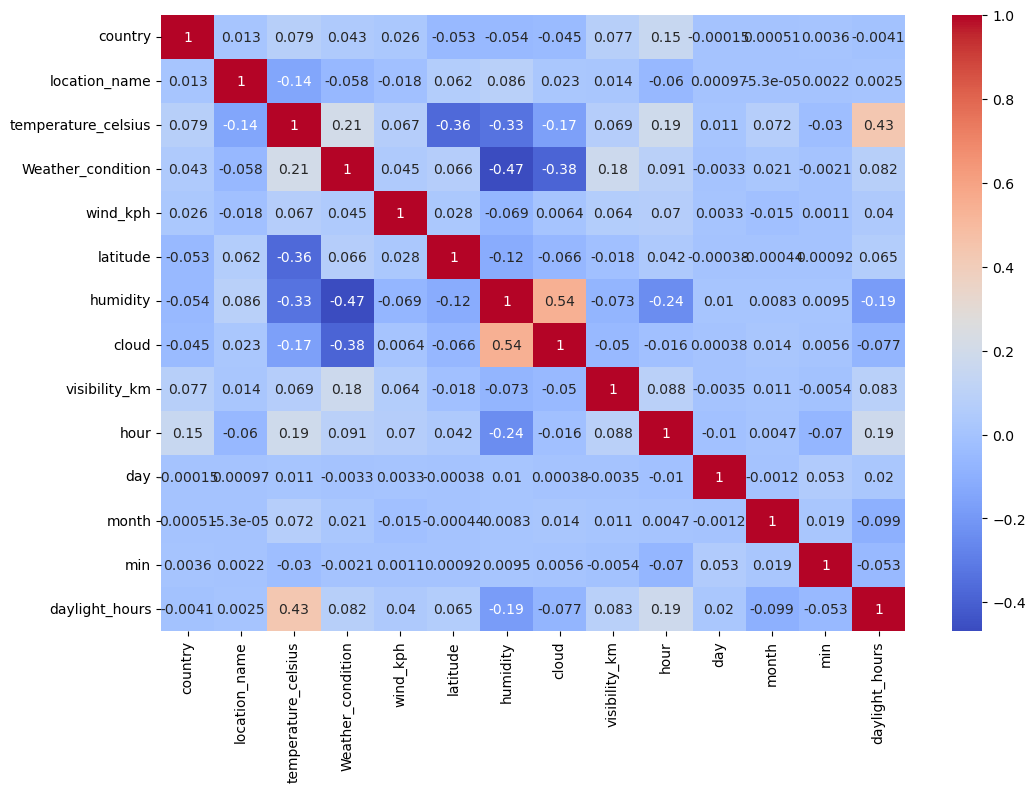

In [57]:

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [59]:
col = df6.pop('temperature_celsius')
df6.insert(0, 'temperature_celsius', col)
col1 = df6.pop('Weather_condition')
df6.insert(13, 'Weather_condition', col1)
df7 = df6.copy()

In [61]:
df7

,temperature_celsius,country,location_name,wind_kph,latitude,humidity,cloud,visibility_km,hour,day,month,min,daylight_hours,Weather_condition
0,26.6,0,98,13.3,34.5200,24,30,10.0,13,16,5,15,14.000000,29
1,19.0,1,225,11.2,41.3300,94,75,10.0,10,16,5,45,14.550000,30
2,23.0,2,11,15.1,36.7600,29,0,10.0,9,16,5,45,14.166667,43
3,6.3,3,14,11.9,42.5000,61,100,2.0,10,16,5,45,14.666667,10
4,26.0,4,122,13.0,-8.8400,89,50,10.0,9,16,5,45,11.716667,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73455,24.2,200,58,7.9,10.5000,78,0,2.0,4,29,5,45,12.700000,18
73456,27.3,201,86,19.8,21.0333,79,75,10.0,15,29,5,45,13.300000,30
73457,26.9,202,205,5.8,15.3547,10,6,10.0,11,29,5,45,12.950000,43
73458,19.7,203,123,17.6,-15.4167,53,23,10.0,10,29,5,45,11.300000,43


In [128]:
train, valid, test = np.split(df7.sample(frac=1, random_state = 42), [int(0.6*len(df7)), int(0.8*len(df7))])

C:\Users\ADMIN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [130]:


def get_xy(dataframe, y_label, x_label = None):
    if x_label is None or len(x_label) == 0:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values.reshape(1, -1)
    else:
        if len(x_label)==1:
            x = dataframe[x_label[0]].values.reshape(-1 ,1)
            
        else:
            x = dataframe[x_label].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((x, y))
    return data , x, y

In [132]:


train, x_train, y_train = get_xy(train, 'temperature_celsius', x_label = df7.columns[1:])
valid, x_valid, y_valid = get_xy(valid, 'temperature_celsius', x_label = df7.columns[1:])
test, x_test, y_test = get_xy(test, 'temperature_celsius', x_label = df7.columns[1:])


In [148]:
y_test

array([[24.3],
       [22.4],
       [13.1],
       ...,
       [17.2],
       [30. ],
       [25.4]])

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [152]:


y_predict = model.predict(x_test)
y_predict

array([[21.0829463 ],
       [23.18110274],
       [14.73371177],
       ...,
       [29.61804196],
       [21.87622444],
       [18.72588517]])

In [154]:
y_test

array([[24.3],
       [22.4],
       [13.1],
       ...,
       [17.2],
       [30. ],
       [25.4]])

In [156]:
mse = mean_squared_error(y_test, y_predict)
print(mse)

49.764165641927434


In [158]:
r_score = r2_score(y_test, y_predict)
print(r_score)

0.42698813160796023


In [160]:
df6.columns[1:]

Index(['country', 'location_name', 'wind_kph', 'latitude', 'humidity', 'cloud',
       'visibility_km', 'hour', 'day', 'month', 'min', 'daylight_hours',
       'Weather_condition'],
      dtype='object')

In [162]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(x_train, y_train.ravel())


RandomForestRegressor(n_estimators=50, random_state=42)

In [164]:
y_pred = model.predict(x_test)
y_pred


array([23.252, 22.866, 11.872, ..., 17.336, 29.802, 24.586])

In [166]:

y_test

array([[24.3],
       [22.4],
       [13.1],
       ...,
       [17.2],
       [30. ],
       [25.4]])

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

3.8763819469098832
0.9553652144399949


In [89]:
X = df6.drop(['Weather_condition'], axis =1)
y = df6['Weather_condition']


In [91]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_test))
print(len(y_train))

14692
58768


In [93]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=50, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [95]:
y_predict = model1.predict(X_test)
y_predict

array([30, 30, 30, ..., 30, 43, 12])

In [97]:
y_test

4492     30
28435    30
30140    30
54193    30
13296     3
         ..
43797    43
26346    30
46494     3
72319    43
34556    12
Name: Weather_condition, Length: 14692, dtype: int32

In [99]:

print(classification_report(y_test, y_predict, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.40      0.50      0.44         4
           2       0.93      0.93      0.93       606
           3       0.63      0.23      0.34       134
           4       0.94      0.85      0.89       139
           5       0.00      0.00      0.00         1
           6       0.90      1.00      0.95         9
           7       1.00      0.57      0.73         7
           8       0.00      0.00      0.00         3
           9       0.56      0.56      0.56         9
          10       0.60      0.27      0.37        79
          11       0.00      0.00      0.00         7
          12       0.44      0.26      0.33       424
          13       0.67      0.45      0.54       387
          14       0.00      0.00      0.00         5
          16       0.50      0.12      0.19        42
          17       0.00      0.00      0.00         6
          18       0.75    

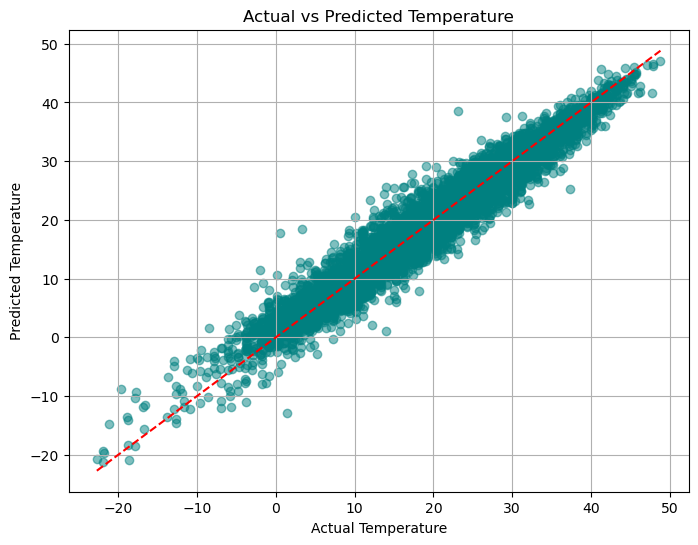

In [170]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()